In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [10]:
with open('script.pkl', 'rb') as file:
    linear_reg_model = pickle.load(file)
    scaler = pickle.load(file)
    encoder = pickle.load(file)
    mode_value = pickle.load(file)
    top_feature = pickle.load(file)

In [11]:
input_csv_file = 'OnlineArticlesPopularity_regression_test.csv'
new_test_dataset = pd.read_csv(input_csv_file)

In [12]:

X_new = new_test_dataset.drop(columns=[' shares', 'url', 'title'])
y = new_test_dataset[' shares']
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [13]:
numeric_columns = X_new.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
        if X_new[col].isnull().any(): 
            X_new[col].fillna(X_new[col].mean(), inplace=True)  

In [14]:
categorical_columns = ['channel type', 'weekday', 'isWeekEnd']
for col in categorical_columns:
    X_new[col].fillna(mode_value, inplace=True)
    X_new[col] = X_new[col].replace("[]", mode_value)

    unseen_categories = set(X_new[col].unique()) - set(encoder.classes_)
    # Replace unseen categories with a known category (e.g., mode) or a default value
    if unseen_categories:
        X_new[col] = X_new[col].apply(lambda x: mode_value if x not in encoder.classes_ else x)
        X_new[col] = encoder.transform(X_new[col])

   

C:\Users\hp\AppData\Local\Temp\ipykernel_14428\3232228716.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_new[col].fillna(mode_value, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_14428\3232228716.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [15]:
numeric_columns = X_new.select_dtypes(include=['float64', 'int64']).columns
new_data_scaled = scaler.transform(X_new[numeric_columns])
X_new[numeric_columns] = new_data_scaled

In [16]:
X_train_selected = X_train[top_feature]
X_test_selected = X_test[top_feature]

Columns in relevant_features: [' num_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' kw_max_min', ' kw_avg_min', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' rate_positive_words', ' avg_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity']
Mean Squared Error (MSE): 22260350.930834282
R-squared (R2) Score: 3.98423548755098


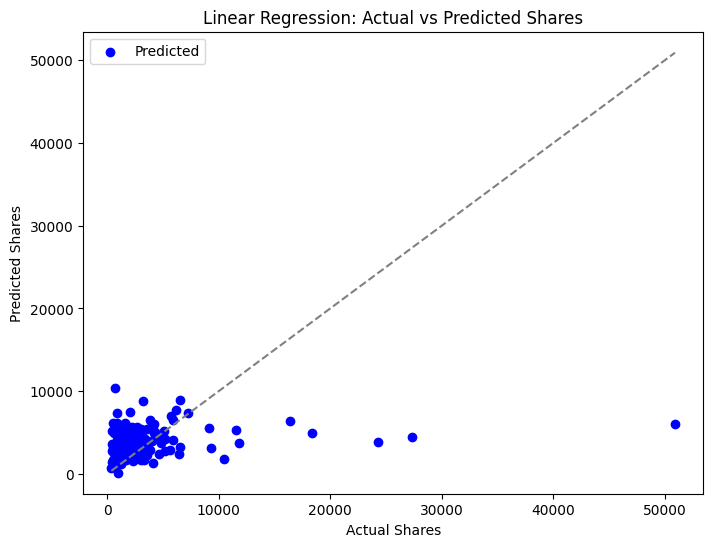

In [17]:
 # Select relevant features (similar to your feature selection)
print("Columns in relevant_features:", list(X_train_selected.columns))
predictions = linear_reg_model.predict(X_test_selected)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Output MSE and R2 score
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2*100)
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')  # Line of best fit
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Linear Regression: Actual vs Predicted Shares')
plt.legend()
plt.show()